In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv(r"C:\Users\imins\Downloads\Activity-20220611T140813Z-001\Activity\Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [56]:
data.shape

(167, 10)

In [57]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [58]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Checking for null values

In [59]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### No null values present

### Converting exports, imports and health into actual numbers

In [60]:
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [61]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Checking for outliers

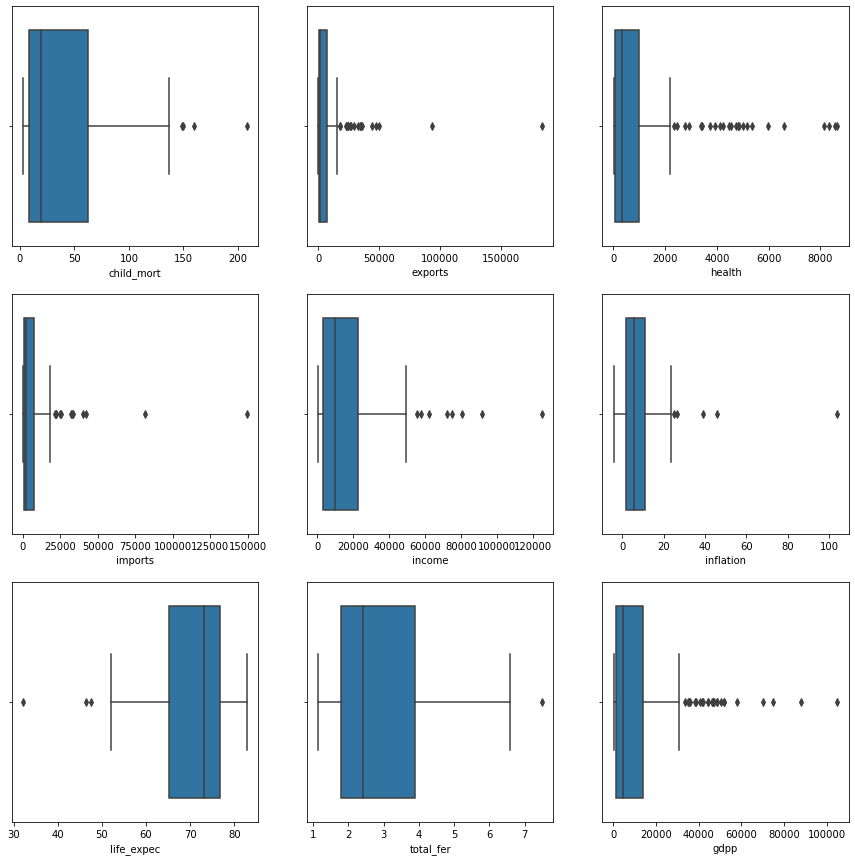

In [62]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [63]:
df = data.copy()

In [64]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [65]:
Q1 = df['exports'].quantile(0.25)
Q2 = df['exports'].quantile(0.50)
Q3 = df['exports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['exports']=np.where(df['exports']>upper_limit,upper_limit,np.where(df['exports']<lower_limit,lower_limit,df['exports']))

In [66]:
Q1 = df['imports'].quantile(0.25)
Q2 = df['imports'].quantile(0.50)
Q3 = df['imports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['imports']=np.where(df['imports']>upper_limit,upper_limit,np.where(df['imports']<lower_limit,lower_limit,df['imports']))

In [67]:
Q1 = df['health'].quantile(0.25)
Q2 = df['health'].quantile(0.50)
Q3 = df['health'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['health']=np.where(df['health']>upper_limit,upper_limit,np.where(df['health']<lower_limit,lower_limit,df['health']))

In [68]:
Q1 = df['income'].quantile(0.25)
Q2 = df['income'].quantile(0.50)
Q3 = df['income'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
df['income']=np.where(df['income']>upper_limit,upper_limit,np.where(df['income']<lower_limit,lower_limit,df['income']))

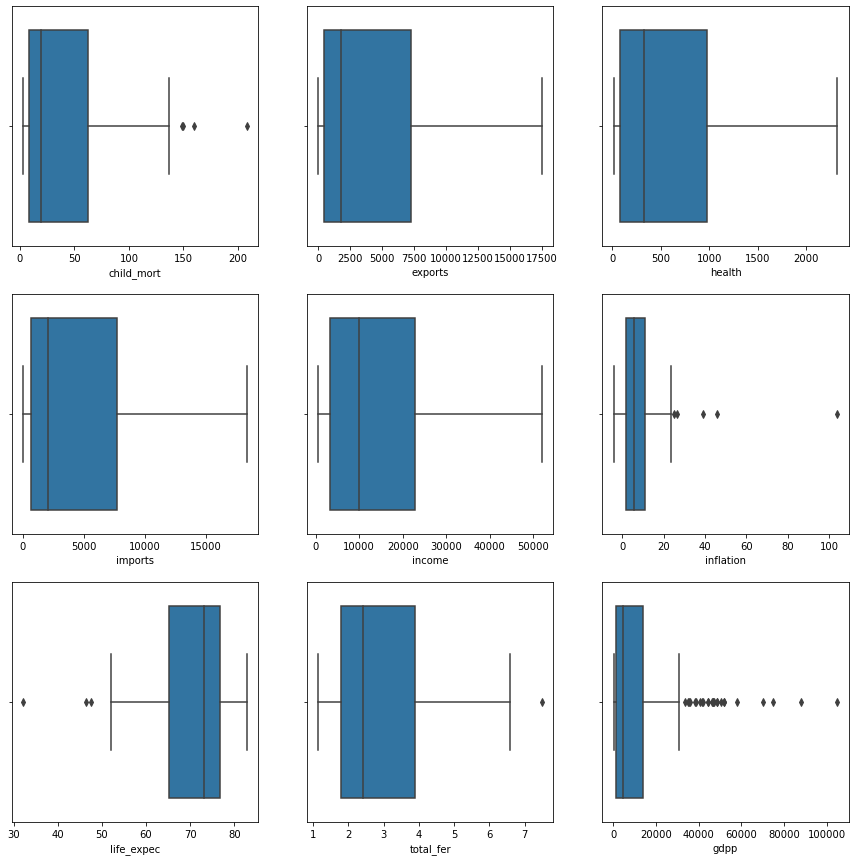

In [69]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(df[i], ax=ax[x])
plt.show()

### Standard Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.iloc[:,1:])

## Model Building

### k-means clustering

In [71]:
from sklearn.cluster import KMeans
ks=range(1,6)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

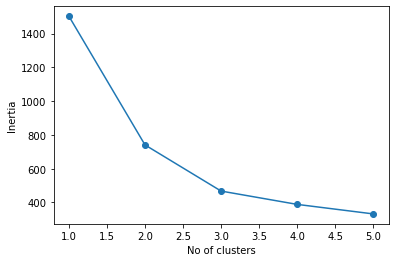

In [72]:
plt.plot(ks,inertia,'-o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

In [73]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data) 
print(y_kmeans)

[2 0 0 2 0 0 0 1 1 0 1 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 1 2 0 0 0 0 0 1 1 0 0 2 0 1 2 0 0 2 1 1 1 2 0 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [74]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data,kmeans.labels_, metric='euclidean',random_state=42)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.445


### Heirachical Agglomertive clustering

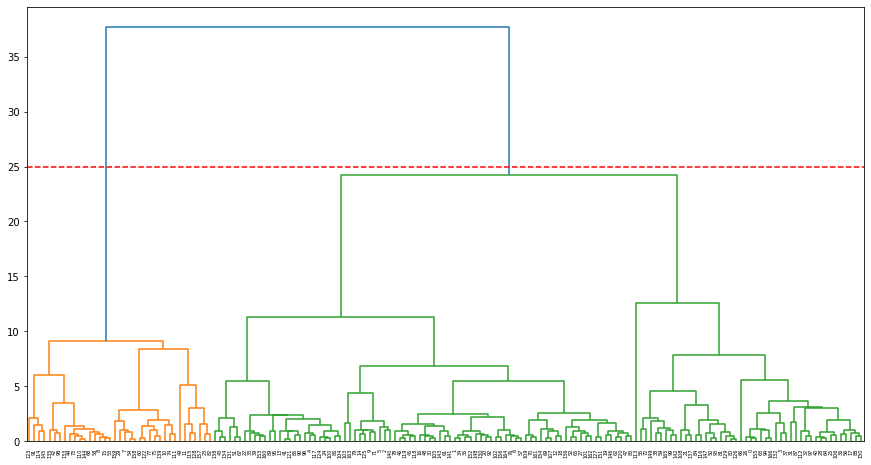

In [75]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(scaled_data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(25,0,5000,colors='r',linestyles='dashed' )
plt.show()

In [76]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(scaled_data)
labels

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [77]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data,labels,metric='euclidean',random_state=42)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.422


##### Comparing Silhouette score kmeans has better perfomance

In [79]:
df['cluster_no']= kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [80]:
dt_new =  df.groupby(['cluster_no']).mean()

In [81]:
dt_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_no,,,,,,,,,
0,23.080723,2567.253958,390.660993,2774.770977,11521.566265,7.603964,72.389157,2.312048,5965.084337
1,5.671795,13796.821026,1980.008000,13620.141795,39834.358974,3.296718,79.733333,1.815897,40933.333333
2,94.537778,790.474867,87.891393,731.346911,3312.733333,11.997000,59.220000,5.102000,1633.600000


In [82]:
cluster0=df[df['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.100,68.3,2.61,592,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.500,69.6,3.51,738,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.140,70.4,2.33,758,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.120,66.1,2.88,786,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.000,68.5,3.10,880,0
...,...,...,...,...,...,...,...,...,...,...,...
67,Hungary,6.0,10715.8000,960.2300,10021.500,22300.0,2.330,74.5,1.25,13100,0
163,Venezuela,17.1,3847.5000,662.8500,2376.000,16500.0,45.900,75.4,2.47,13500,0
41,Croatia,5.5,5076.0000,1047.6000,5143.500,20100.0,0.821,76.3,1.55,13500,0
51,Estonia,4.5,10964.6000,880.3800,10030.200,22700.0,1.740,76.0,1.72,14600,0
